In [1]:
import numpy as np
import pandas as pd
from __future__ import division

import matplotlib.pyplot as plt

## Part 1: Getting the dataset (DSFS Chapter 9)

### Exercise: Reading in crime-data from San Francisco

In [2]:
df = pd.read_csv("SFPD_Incidents_-_from_1_January_2003.csv")
df = df.dropna()

In [3]:
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,150060275,NON-CRIMINAL,LOST PROPERTY,Monday,01/19/2015,14:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.421582,37.761701,"(37.7617007179518, -122.42158168137)",15006027571000
1,150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821003074
2,150098210,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821004014
3,150098210,SECONDARY CODES,DOMESTIC VIOLENCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821015200
4,150098226,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,01/27/2015,19:00,NORTHERN,NONE,LOMBARD ST / LAGUNA ST,-122.431119,37.800469,"(37.8004687042875, -122.431118543788)",15009822628160


In [4]:
columns = ["Category", "Date", "Time", "PdDistrict", 'X', 'Y']
df = df[columns]

In [5]:
df.head()

,Category,Date,Time,PdDistrict,X,Y
0,NON-CRIMINAL,01/19/2015,14:00,MISSION,-122.421582,37.761701
1,ROBBERY,02/01/2015,15:45,TENDERLOIN,-122.414406,37.784191
2,ASSAULT,02/01/2015,15:45,TENDERLOIN,-122.414406,37.784191
3,SECONDARY CODES,02/01/2015,15:45,TENDERLOIN,-122.414406,37.784191
4,VANDALISM,01/27/2015,19:00,NORTHERN,-122.431119,37.800469


* **What is the total number of incidents in the CSV file?**

The total number of incidents is 2023864.

In [6]:
df.shape

(2023864, 6)

## Part 2: Working with data (DSFS Chapter 10)

### Exercise: The types of crime and their popularity over time. The first field we'll dig into is the column "Category".

* **Create a set() of all the categories of crime in the dataset. How many are there?**

In by calling `len(set(df["Category"]))` it can be seen that there are 39 categories of crime in the dataset.

In [7]:
set(df["Category"])

{'ARSON',
 'ASSAULT',
 'BAD CHECKS',
 'BRIBERY',
 'BURGLARY',
 'DISORDERLY CONDUCT',
 'DRIVING UNDER THE INFLUENCE',
 'DRUG/NARCOTIC',
 'DRUNKENNESS',
 'EMBEZZLEMENT',
 'EXTORTION',
 'FAMILY OFFENSES',
 'FORGERY/COUNTERFEITING',
 'FRAUD',
 'GAMBLING',
 'KIDNAPPING',
 'LARCENY/THEFT',
 'LIQUOR LAWS',
 'LOITERING',
 'MISSING PERSON',
 'NON-CRIMINAL',
 'OTHER OFFENSES',
 'PORNOGRAPHY/OBSCENE MAT',
 'PROSTITUTION',
 'RECOVERED VEHICLE',
 'ROBBERY',
 'RUNAWAY',
 'SECONDARY CODES',
 'SEX OFFENSES, FORCIBLE',
 'SEX OFFENSES, NON FORCIBLE',
 'STOLEN PROPERTY',
 'SUICIDE',
 'SUSPICIOUS OCC',
 'TREA',
 'TRESPASS',
 'VANDALISM',
 'VEHICLE THEFT',
 'WARRANTS',
 'WEAPON LAWS'}

* **Now count the number of occurrences of each category in the dataset. What is the most commonly occurring category of crime? What is the least frequently occurring?**

The most frequently occuring crime is larceny/theft: 422170 times.

The least frequently occuring crime is TREA':  13 times.

*'trespassing or loitering near posted industrial property*

In [8]:
from collections import Counter

crime_type_count = Counter(df["Category"]).most_common()

In [9]:
crime_type_count = zip(*crime_type_count)  # unzip it into crime type and count
crime_type_count = list(crime_type_count)  # make it into a list of two tuples
print(crime_type_count[0][0], crime_type_count[1][0])
print(crime_type_count[0][-1], crime_type_count[1][-1])

('LARCENY/THEFT', 422169)
('TREA', 13)


* **Create a histogram over crime occurrences. **

In [10]:
crime_type = crime_type_count[0]
crime_category_count = crime_type_count[1]

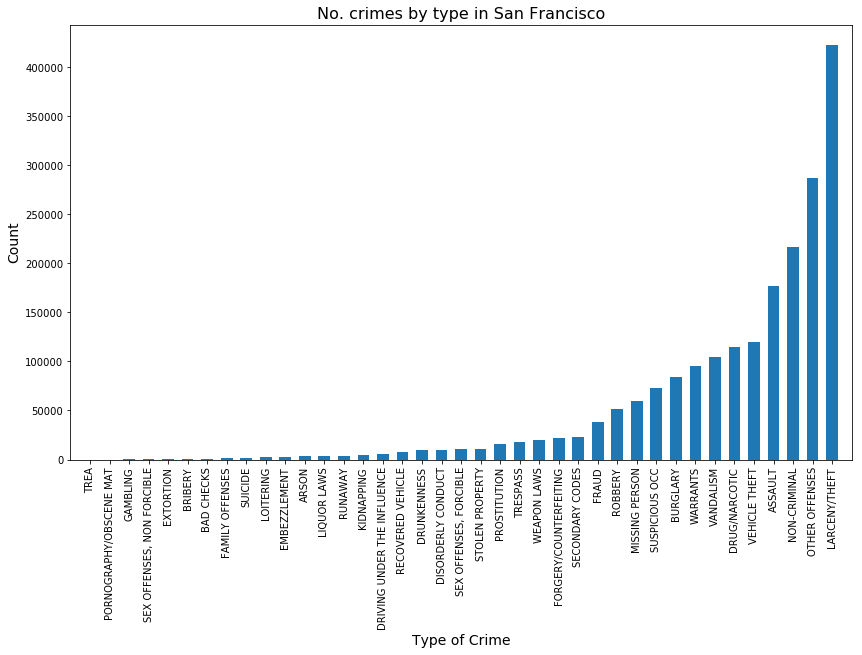

In [11]:
fig = plt.figure(figsize=(14, 8)) # initialize the general figure

indices = list(range(len(crime_category_count)))  

ax = fig.add_subplot(1,1,1)  # this is basically just a part of our figure

ax.bar(indices, crime_category_count[::-1], width=0.6, align="center")  
ax.set_xticks(indices)  
ax.set_xticklabels(crime_type[::-1], rotation=90)

ax.set_xlabel("Type of Crime", fontsize=14)
ax.set_ylabel("Count", fontsize=14)
ax.set_title("No. crimes by type in San Francisco", fontsize=16)
ax.set_xlim(-1,len(indices))
    
plt.show()

* **Now it's time to explore how the crime statistics change over time. To start off easily, let's count the number of crimes per year for the years 2003-2016 (the full years in the database). For that one, I used the date column in the CSV file and used year = int( date.split("/")[-1] ) to extract the year of each crime.

In [12]:
df.head()

,Category,Date,Time,PdDistrict,X,Y
0,NON-CRIMINAL,01/19/2015,14:00,MISSION,-122.421582,37.761701
1,ROBBERY,02/01/2015,15:45,TENDERLOIN,-122.414406,37.784191
2,ASSAULT,02/01/2015,15:45,TENDERLOIN,-122.414406,37.784191
3,SECONDARY CODES,02/01/2015,15:45,TENDERLOIN,-122.414406,37.784191
4,VANDALISM,01/27/2015,19:00,NORTHERN,-122.431119,37.800469


In [13]:
# Create a new column ('Year'), by applying a function that grabs the last element of split Date
df['Year'] = df.loc[:,('Date')].apply(lambda x: x.split("/")[-1])

In [14]:
df.head()

,Category,Date,Time,PdDistrict,X,Y,Year
0,NON-CRIMINAL,01/19/2015,14:00,MISSION,-122.421582,37.761701,2015
1,ROBBERY,02/01/2015,15:45,TENDERLOIN,-122.414406,37.784191,2015
2,ASSAULT,02/01/2015,15:45,TENDERLOIN,-122.414406,37.784191,2015
3,SECONDARY CODES,02/01/2015,15:45,TENDERLOIN,-122.414406,37.784191,2015
4,VANDALISM,01/27/2015,19:00,NORTHERN,-122.431119,37.800469,2015


In [15]:
def count_sort_split(column):
    
    '''
    A function to take a column in a dataframe, count all the unique values and the counts according to the values.
    '''
    
    counted_items = Counter(column).items()							# count and make a a list of tuples (value, count)
    sorted_counts = sorted(counted_items, key=lambda x: x[0])		# sort it according to what lambda returns (x[0])
    split_values_counts = list(zip(*sorted_counts))					# split it into two tuples
    values, counts = split_values_counts[0], split_values_counts[1]
    return values, counts

In [16]:
non_2017_column = df[df['Year'] != '2017']['Year']

years, crime_year_count = count_sort_split(non_2017_column)

In [17]:
non_2017_column.shape

(2012228,)

Plotting crimes per year in San Francisco

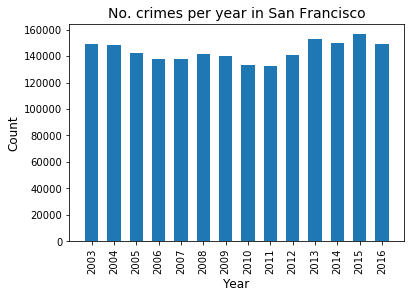

In [18]:
fig = plt.figure(figsize=(6, 4)) # initialize the general figure
ax = fig.add_subplot(1,1,1)	

indices = list(range(len(years)))


ax.bar(indices, crime_year_count, width=0.6, align="center")	
ax.set_xticks(indices)								
ax.set_xticklabels(years, rotation=90)				

ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.set_title("No. crimes per year in San Francisco", fontsize=14)
ax.set_xlim(-1,len(indices))

plt.show()

* **What's the average number of crimes per year?**

In [19]:
avg_crimes_per_year = np.sum(crime_year_count)/len(years)
int(np.round(avg_crimes_per_year, 0))

143731

* **Police chief Suneman is interested in the temporal development of only a subset of categories, the so-called focus crimes. Those categories are listed below (for convenient copy-paste action). Now create bar-charts displaying the year-by-year development of each of these categories across the years 2003-2016.**

In [20]:
subcrime_year_column = df[df['Category'] == 'ASSAULT']['Year']
subcrime_year, subcrime_count = count_sort_split(subcrime_year_column)
subcrime_count

(13461,
 12899,
 11601,
 12449,
 12518,
 12681,
 12284,
 12387,
 12279,
 12181,
 12580,
 12402,
 13115,
 13522,
 1048)

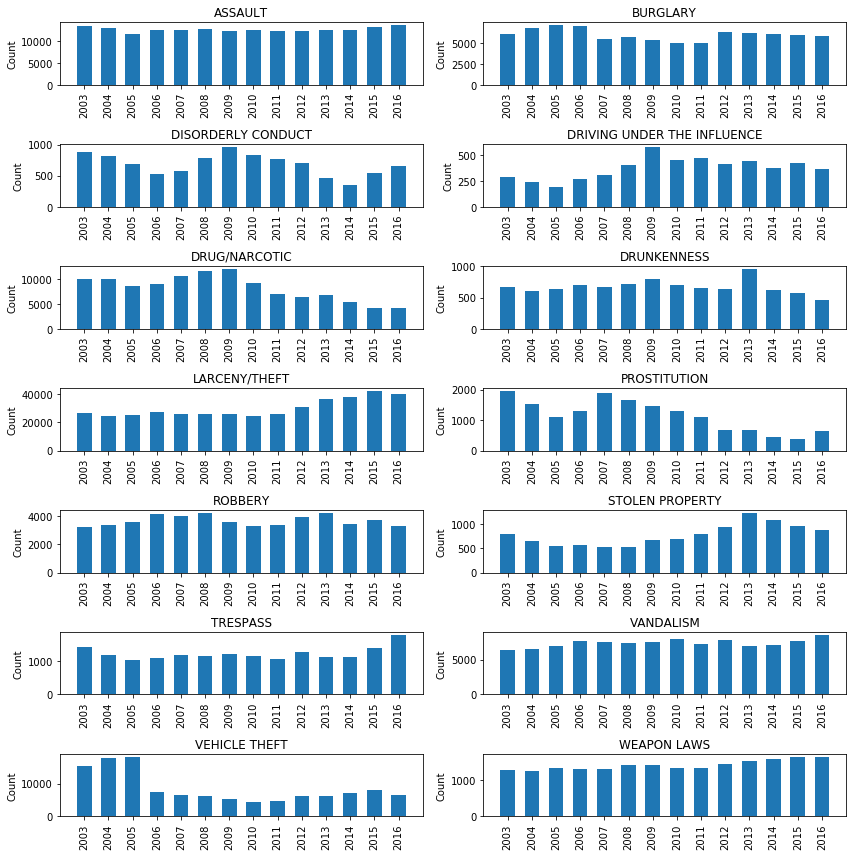

In [21]:
# Plotting types of crimes by year in SF

focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', \
                   'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', \
                   'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

fig = plt.figure(figsize=(12,12))

n_rows = 7
n_columns = 2
no_subplot = 1

for crime in sorted(focuscrimes):
    
    ax = fig.add_subplot(n_rows,n_columns,no_subplot)
    
    subcrime_year_column = df[(df['Category'] == crime) & (df['Year'] != '2017')]['Year'] # skip 2017
    subcrime_year, subcrime_count = count_sort_split(subcrime_year_column)
    
    indices = list(range(len(subcrime_year)))

    ax.bar(indices, subcrime_count, width=0.6, align="center")
    ax.set_xticks(indices)								
    ax.set_xticklabels(subcrime_year, rotation=90)				

    ax.set_ylabel("Count", fontsize=10)
    ax.set_title(crime, fontsize=12)
    ax.set_xlim(-1,len(indices))

    no_subplot += 1

plt.tight_layout()
plt.show()

* **Comment on at least three interesting trends in your plot.**

1\. Drug narcotics offences decrease steadily after 2009. This might be attributed to the fact that the SF police started focusing less on minor drug offences after 2009 (http://www.sfexaminer.com/sf-drug-arrests-see-steep-plunge-while-violent-crime-mostly-steady/).

2\. Prostitution offences decrease steadily after 2007. Rather than prostitution actually decreasing - it might be that law enforcement is focusing less on prostitution offences.

3\. Larceny/theft increase steadly from 2011. One theory is that the increase is due to a bigger income disparity, fueled by the recent tech boom in SF (http://sanfrancisco.cbslocal.com/2015/06/10/car-break-ins-robberies-on-the-rise-in-san-francisco/). 

###  Exercise: The types of crime and their popularity across the 24 hours of the day.

* **First, plot a simple histogram of the number of crimes per hour in the dataset**

In [22]:
df['Hour'] = df.loc[:,('Time')].apply(lambda x: x.split(":")[0])

In [23]:
df.head()

,Category,Date,Time,PdDistrict,X,Y,Year,Hour
0,NON-CRIMINAL,01/19/2015,14:00,MISSION,-122.421582,37.761701,2015,14
1,ROBBERY,02/01/2015,15:45,TENDERLOIN,-122.414406,37.784191,2015,15
2,ASSAULT,02/01/2015,15:45,TENDERLOIN,-122.414406,37.784191,2015,15
3,SECONDARY CODES,02/01/2015,15:45,TENDERLOIN,-122.414406,37.784191,2015,15
4,VANDALISM,01/27/2015,19:00,NORTHERN,-122.431119,37.800469,2015,19


In [24]:
#crimes_per_hour = Counter(df['Hour']).items()
#crimes_per_hour = sorted(crimes_per_hour, key=lambda x: x[0])
#crimes_per_hour = list(zip(*crimes_per_hour))
#crime_hour, crime_hour_count = crimes_per_hour[0], crimes_per_hour[1]
crime_hour, crime_hour_count = count_sort_split(df['Hour'])

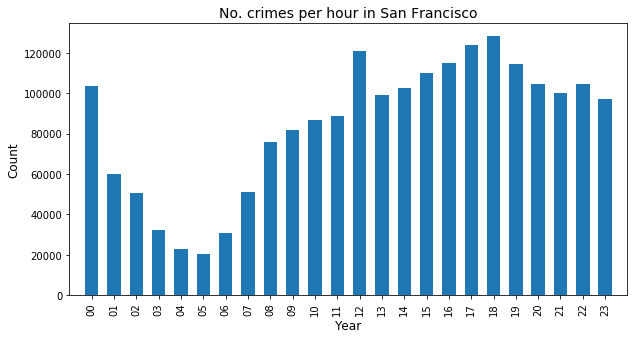

In [25]:
fig = plt.figure(figsize=(10, 5)) # initialize the general figure
ax = fig.add_subplot(1,1,1)	

indices = list(range(len(crime_hour)))

ax.bar(indices, crime_hour_count, width=0.6, align="center")	
ax.set_xticks(indices)								
ax.set_xticklabels(crime_hour, rotation=90)				

ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.set_title("No. crimes per hour in San Francisco", fontsize=14)
ax.set_xlim(-1,len(indices))

plt.show()

* **There's a little strange peak at 12:00 - what do you think is going on there?**

The two explanations I can think of are that either more crimes get committed around noon or that police officers tend to report more crimes happening around noon (compared with 11:00 and 13:00). 

* **Next create a plot of the count of each crime category across the 24 hours of the day. Again, comment on at least three trends in the data. **

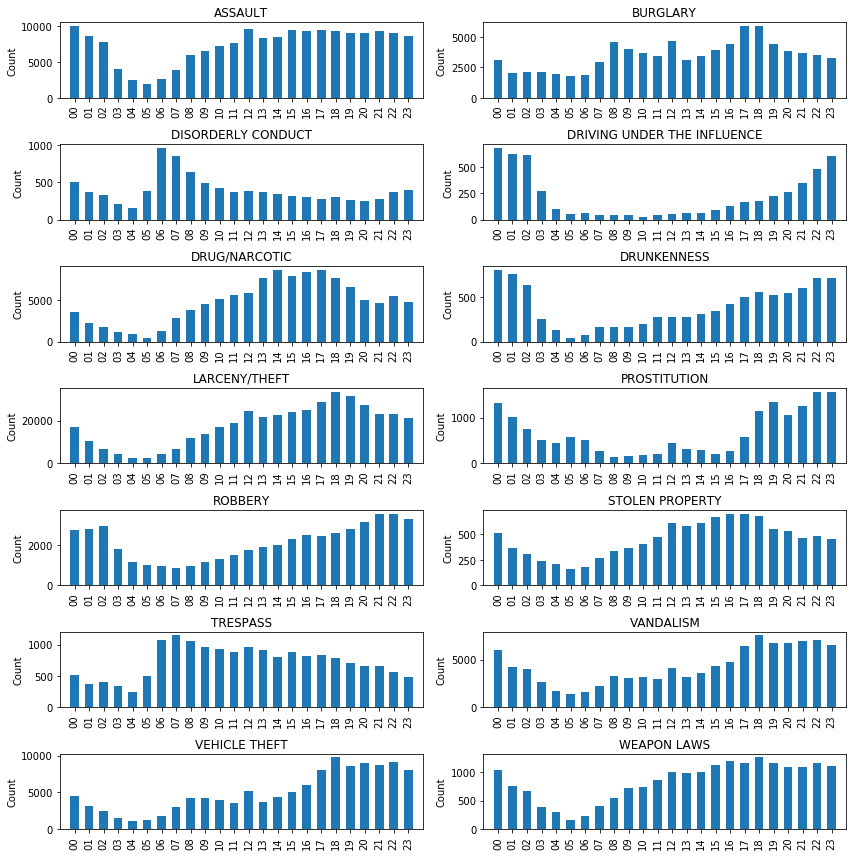

In [26]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', \
                   'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', \
                   'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])


fig = plt.figure(figsize=(12,12))

n_rows = 7
n_columns = 2
no_subplot = 1

for crime in sorted(focuscrimes):
    
    
    ## Selecting data ##
    subcrime_hour_column = df[df['Category'] == crime]['Hour']
    subcrime_hour, subcrime_count = count_sort_split(subcrime_hour_column)
    
    ## Plotting ##
    ax = fig.add_subplot(n_rows,n_columns,no_subplot)
    indices = list(range(len(subcrime_hour)))

    ax.bar(indices, subcrime_count, width=0.6, align="center")	
    ax.set_xticks(indices)								
    ax.set_xticklabels(subcrime_hour, rotation=90)				

    ax.set_ylabel("Count", fontsize=10)
    ax.set_title(crime, fontsize=12)
    ax.set_xlim(-1,len(indices))

    no_subplot += 1

plt.tight_layout()
plt.show()

* **Again, comment on at least three trends in the data. **

1\. Not surprisingly, driving under the influence happens more during the nighttime than during daytime. 

2\. There is an interesting spike in disorderly conduct from 06 - 08 in the morning. It might be that the individuals "disturbing the peace" have been out drinking heavily earlier in the night. The fact that they are drunk is reported as disorderly conduct during the morning as opposed to being reported as drunkenness when they disturb the peace during nighttime.

3\. There is a general drop in offences from around 02-06. In addition to many people that might commit a crime being asleep at these hours, there is also the possibility of fewer police officers patrolling at night - meaning that fewer crimes committed during that time get caught when compared to daytime.

### Exercises: The types of crime and how they take place across San Francisco's police districts.

* **So now we'll be combining information about PdDistrict and Category to explore differences between SF's neighborhoods. First, simply list the names of SF's 10 police districts.**

In [27]:
districts = set(df['PdDistrict'])
districts

{'BAYVIEW',
 'CENTRAL',
 'INGLESIDE',
 'MISSION',
 'NORTHERN',
 'PARK',
 'RICHMOND',
 'SOUTHERN',
 'TARAVAL',
 'TENDERLOIN'}

In [28]:
crimes_per_district = Counter(df['PdDistrict'])

sorted_crimes_per_district = sorted(crimes_per_district.items(), key=lambda x: x[1])
sorted_crimes_per_district

[('RICHMOND', 105373),
 ('PARK', 115047),
 ('TARAVAL', 152067),
 ('INGLESIDE', 179593),
 ('TENDERLOIN', 180708),
 ('CENTRAL', 202342),
 ('BAYVIEW', 203841),
 ('NORTHERN', 246991),
 ('MISSION', 273386),
 ('SOUTHERN', 364516)]

As can be seen districts with the fewest and highest crime counts are:

- Richmond: 105373
- Southern: 364516

**First, we need to calculate the relative probabilities of seeing each type of crime in the dataset as a whole.**

In [29]:
# Grab the total number of crimes
sum_crimes = np.sum(crime_category_count)
sum_crimes

2023864

In [30]:
# Calculate the probability of seeing each crime in the dataset as a whole b
all_crime_category_count = Counter(df['Category'])
all_crime_category_count = {n: all_crime_category_count[n]/sum_crimes for n in all_crime_category_count}
all_crime_category_count

{'ARSON': 0.0017412237185897867,
 'ASSAULT': 0.087657569876236741,
 'BAD CHECKS': 0.00044024697311677069,
 'BRIBERY': 0.00036168438195451866,
 'BURGLARY': 0.041513164916219668,
 'DISORDERLY CONDUCT': 0.00473006091318389,
 'DRIVING UNDER THE INFLUENCE': 0.0026197412474355986,
 'DRUG/NARCOTIC': 0.056886727566674442,
 'DRUNKENNESS': 0.0046603922002664208,
 'EMBEZZLEMENT': 0.0013577987453702422,
 'EXTORTION': 0.00033055580809777734,
 'FAMILY OFFENSES': 0.00055734970333975011,
 'FORGERY/COUNTERFEITING': 0.011044714466979995,
 'FRAUD': 0.018927161113592612,
 'GAMBLING': 0.00016107801709996323,
 'KIDNAPPING': 0.0025080736650288753,
 'LARCENY/THEFT': 0.20859553804010547,
 'LIQUOR LAWS': 0.0019744409703418807,
 'LOITERING': 0.001176956554392983,
 'MISSING PERSON': 0.029378456259906791,
 'NON-CRIMINAL': 0.1071084815975777,
 'OTHER OFFENSES': 0.14167305708288699,
 'PORNOGRAPHY/OBSCENE MAT': 2.4705217346620127e-05,
 'PROSTITUTION': 0.0079862085594684228,
 'RECOVERED VEHICLE': 0.0039785282014997052

**Next, we calculate that same probability distribution but for each PD district, let's call that P(crime|district).**

In [31]:
from collections import defaultdict

district_crime_count = Counter(df['PdDistrict'])
p_crime_district = {}

# loop through all our districts
for district in districts:
    
    current_district_dict = defaultdict()
    
    current_district_crime_sum = crimes_per_district[district]
    current_district_crime_types = Counter(df[df['PdDistrict'] == district]['Category'])
    
    # calculate the ratio for each crime in the current district
    for crime in focuscrimes:
        current_district_p_crime = current_district_crime_types[crime]/current_district_crime_sum
        current_district_dict[crime] = current_district_p_crime/all_crime_category_count[crime]
    
    p_crime_district[district] = current_district_dict
    
p_crime_district['RICHMOND']

defaultdict(None,
            {'ASSAULT': 0.78382623409418517,
             'BURGLARY': 1.375056179735201,
             'DISORDERLY CONDUCT': 0.43738150569662232,
             'DRIVING UNDER THE INFLUENCE': 2.6661837158289337,
             'DRUG/NARCOTIC': 0.34966404886108488,
             'DRUNKENNESS': 0.68827958601958827,
             'LARCENY/THEFT': 1.139518437875511,
             'PROSTITUTION': 0.067733709900322986,
             'ROBBERY': 0.65345484119230546,
             'STOLEN PROPERTY': 0.85892068559424262,
             'TRESPASS': 0.61793829885709139,
             'VANDALISM': 1.3200425969403911,
             'VEHICLE THEFT': 1.4664990803888105,
             'WEAPON LAWS': 0.68058506928583185})

* **For each district plot these ratios for the 14 focus crimes.**

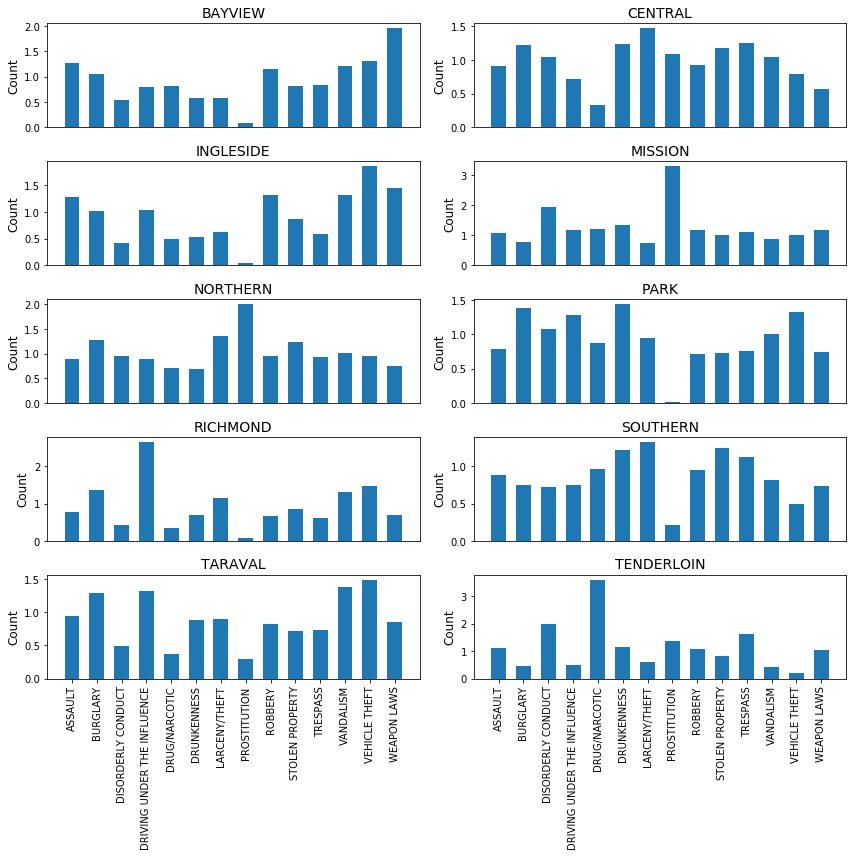

In [32]:
fig = plt.figure(figsize=(12,12))

n_rows = 5
n_columns = 2
subplot = 1

for district in sorted(p_crime_district):
    
    district_crime_ratios = sorted(p_crime_district[district].items(), key = lambda x: x[0])
    district_crime_ratios = list(zip(*district_crime_ratios))
    district_crime, district_ratio = district_crime_ratios[0], district_crime_ratios[1]
    
    indices = list(range(len(district_crime)))  

    ax = fig.add_subplot(n_rows,n_columns,subplot)	

    ax.bar(indices, district_ratio, width=0.6, align="center")	
    ax.set_xticks([])
    
    if subplot > 8:
        ax.set_xticks(indices)								
        ax.set_xticklabels(district_crime, rotation=90)				

    ax.set_ylabel("Count", fontsize=12)
    ax.set_title(district, fontsize=14)
    ax.set_xlim(-1,len(indices))
    
    subplot+=1 
    
plt.tight_layout()
plt.show()

* **Comment on the top crimes in Tenderloin, Mission, and Richmond. Does this fit with the impression you get of these neighborhoods on Wikipedia?**


  * Tenderloin (Drug/Narcotic): The area has been the scene of escalating drug violence in 2007, including brazen daylight shootings, as local gangs from San Francisco, and others from around the Bay Area battle for turf. 14 of the city's 98 homicides took place in the area in 2007.
  
  
  * Mission (Prostitution): According to a recent article on crime in the mission district, prostitution and other forms of crime have been on the rise since 2014. One possible explanation provided in the article is that as police was focusing heavily on other districts in SF, the criminal activity spills over to other areas - such as the Mission district.
  
  
  * Richmond (Driving under the influence): Richond known as a safe, peaceful, serene, family neighborhood, and one of the city's largest as a whole, both in terms of housing stock and population. Therefore it is not surprising that violent crime is lower in the district - and crimes committed by "non-professional" criminals (such as DUI) is higher.

* ** Even though we only plotted the ratios for our 14 focus crimes, I asked you to calculate the ratios based on all crime categories. Why do you think I wanted to include all crime types in the calculation?**

By using all the crimes in the when calculating the probabilities (and therefore ratios) for the whole population and individual districts, we are calculating the probability of the crime overall [p(crime|location)] rather than the probability of a given crime within the focus crimes [p(crime|location, focuscrime)]. If we only look at the focus crimes, we are not accounting for the total population size, which means that we are we are only comparing the percentages within each population - and not how big of a sample each population accounts for.

### Part 4: A little bit of plotting

In [33]:
df.head()

,Category,Date,Time,PdDistrict,X,Y,Year,Hour
0,NON-CRIMINAL,01/19/2015,14:00,MISSION,-122.421582,37.761701,2015,14
1,ROBBERY,02/01/2015,15:45,TENDERLOIN,-122.414406,37.784191,2015,15
2,ASSAULT,02/01/2015,15:45,TENDERLOIN,-122.414406,37.784191,2015,15
3,SECONDARY CODES,02/01/2015,15:45,TENDERLOIN,-122.414406,37.784191,2015,15
4,VANDALISM,01/27/2015,19:00,NORTHERN,-122.431119,37.800469,2015,19


In [34]:
import geoplotlib
from geoplotlib.utils import BoundingBox 
from scipy import stats

df = df[(np.abs(stats.zscore(df[['X','Y']])) < 3).all(axis=1)][['X','Y']] # remove obs that are not within 3 stds

latitute_list = df['Y']
longitude_list = df['X']

geo_data_for_plotting = {"lat": latitute_list,
                         "lon": longitude_list}

In [35]:
max_lat, min_lat = max(latitute_list), min(latitute_list) 
max_lon, min_lon = max(longitude_list), min(longitude_list) 

bbox = BoundingBox(north=max_lat, west=min_lon, south=min_lat, east=max_lon)
geoplotlib.set_bbox(bbox)

geoplotlib.kde(geo_data_for_plotting, bw=6, alpha=160, cut_below=1e-3)
geoplotlib.inline()

('smallest non-zero count', 2.7215164949382076e-06)
('max count:', 268.27890777981361)


* **Note that there's very bright spot just south of south of market. Check out the map carefully and see if you can figure out what it is**



The bright spot seems to be where San Francisco's [Hall of Justice](https://goo.gl/maps/DexDLPzTTMG2) is located. It can be that when a certain crime doesn't have a location associated with it - it's location is marked at the Hall of Justice.